In [67]:

import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nigam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nigam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [68]:

df = pd.read_csv('mydataset.csv')

In [69]:
df.head(202)

,text,value
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0
1,है कौन ये मादरचोद,1
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0
...,...,...
197,chudaikhana bna rkha h salo ne,1
198,jhaat bhr ki aukad nhi aajte h gand marane gaa...,1
199,Haram ki kamai aur acche waqt me guroor ni kar...,0
200,kameeni aurat chup kr,1


In [70]:

pandas_profiling.ProfileReport(df)

NameError: name 'pandas_profiling' is not defined

In [71]:

df.head()

,text,value
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0
1,है कौन ये मादरचोद,1
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0


In [72]:
df.shape

(203, 2)

In [73]:

df.drop_duplicates(inplace = True)

In [74]:

df.shape

(203, 2)

In [75]:

df['text'].isna().sum()

0

In [76]:
df['value'].isna().sum()


0

In [77]:
df.shape

(203, 2)

In [78]:
#Code to remove @
df['clean_tweet'] = df['text'].apply(lambda x : ' '.join([text for text in x.split()if not text.startswith("@")]))

In [79]:
df.head(126)

,text,value,clean_tweet
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु ...
1,है कौन ये मादरचोद,1,है कौन ये मादरचोद
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रतिवर्...
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...
...,...,...,...
121,i txt my old bitch my new bitch pussy wetter,1,i txt my old bitch my new bitch pussy wetter
122,wear pushup bra for boob support,0,wear pushup bra for boob support
123,meow meow pussy cat pussy cat come in,0,meow meow pussy cat pussy cat come in
124,momma said no pussy cats inside my doghouse,0,momma said no pussy cats inside my doghouse


In [80]:

#Removing all the greek characters using unidecode library

df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [81]:

df["clean_tweet"] = df['clean_tweet'].str.replace('[^\w\s]','')


In [82]:
df.head()

,text,value,clean_tweet
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0,modii kyaa aaye diidii pttel bos bhgt siNh raa...
1,है कौन ये मादरचोद,1,hai kaun ye maadrcod
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0,aasthaa ke mhaaprv chtthii me jo maaN apne bcc...
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0,vrss meN bhaart srkaar dvaaraa akttuubr ko prt...
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0,kejriivaal srkaar jo phrii ttiktt dene kaa ddh...


In [84]:
#Removing the word 'hmm' and it's variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'ky(a)+' ]))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'mod(i)+' ]))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'k(i)+' ]))

In [85]:

import string
df['clean_tweet'] = df['clean_tweet'].str.replace('\d+', '')
df['clean_tweet'] = df['clean_tweet'].str.replace('_', '')

In [86]:

df['clean_tweet'][202]

'jai shriiraam bol bhncod https:// twitter.com/NationalVoice /status/1134459724760571910 ...'

In [87]:
#Code for removing slang words
d = {'luv':'love','wud':'would','wnna':'want','lyk':'like','uh':'you','wateva':'whatever','ttyl':'talk to you later','kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother','F.O.':'fuck off',
'cud':'could','fud':'food'} ## Need a huge dictionary
words = "i luv uh"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [88]:

reformed

'i love you'

In [89]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [90]:
df['clean_tweet'][135]

'Baseball season for the win. #Yankees" This is where the love started'

In [91]:
#Removing stopwords
nltk.download('stopwords')
STOP_WORDS = nltk.corpus.stopwords.words('english')
newstop = [
"के",
"का",
"एक",
"में",
"की",
"है",
"यह",
"और",
"से",
"हैं",
"को",
"पर",
"इस",
"होता",
"कि",
"जो",
"कर",
"मे",
"गया",
"करने",
"किया",
"लिये",
"अपने",
"ने",
"बनी",
"नहीं",
"तो",
"ही",
"या",
"एवं",
"दिया",
"हो",
"इसका",
"था",
"द्वारा",
"हुआ",
"तक",
"साथ",
"करना",
"वाले",
"बाद",
"लिए",
"आप",
"कुछ",
"सकते",
"किसी",
"ये",
"इसके",
"सबसे",
"इसमें",
"थे",
"दो",
"होने",
"वह",
"वे",
"करते",
"बहुत",
"कहा",
"वर्ग",
"कई",
"करें",
"होती",
"अपनी",
"उनके",
"थी",
"यदि",
"हुई",
"जा",
"ना",
"इसे",
"कहते",
"जब",
"होते",
"कोई",
"हुए",
"व",
"न",
"अभी",
"जैसे",
"सभी",
"करता",
"उनकी",
"तरह",
"उस",
"आदि",
"कुल",
"एस",
"रहा",
"इसकी",
"सकता",
"रहे",
"उनका",
"इसी",
"रखें",
"अपना",
"पे",
 "क्या",
  "आये",
"उसके",
"कौन",
"देने ",
"कभी",
"आपने",
"क्यों",
"मिला",
"बोलो",
"चाहिए",
"भी",
"डालने",
"रखती",
"देखा",
"साल",
"हु",
"नही",
"लगा",
"वो",
"आपको",
"बजे",
"उसका",
"आया",
"फिर",
 "मेने",
 "इनके",
  "सामने",
   "झुक",
   "मनाई",
   "वैसे",
   "उठाया",
   "बोला",
   "रख","सोने", "दे", "काट",
   "बोला",
   "रख",
   "अब", 
   "गये",
   "सबका",
   "इसको",
      "ये",
    "समझ",
     "सका",
     "कैसे",
      "अगर",
      "तू",
      "क्यू",
       "चला",
        "जाता",
"तेरे",
"किसने",
"जी",
"बोले",
"होगा",
"वही",
 "जाती",
  "शुरू",
  "आज",
   "पूरे",
   "मारेगा" ,
   "आए",
   "अबे",
   "होतीं",
   "अबकी",
   "बार",
   "वाला",
    "बताने",
      "मै",
      "तुमको",
      "हूँ",
      "कह",
      "सब",
     "मना",
     "आ",
      "रही",
    "वरना",
     "कल",
     "सबके",
     "सब",
     " कह",
     "हर",
     "तुम",
     "बोल",
"आता",
 "इधर",
 "लगता","लेकिन", "तनिक",
 "अरे",
"रा",
 "है",
 "।",
 "देखो",
  "कितने",
  "निकलेगा",
  "है।",
  "तुने",
  "आपकी",
  "हे" ,
  "रे",
  "तूँ।",
  "तेरी",
  "जायेगी",
  "बनकर",
  "जाने",
  "तेरी",
  "बनाने",
  "गए",
  "जरा",
"करलो",
 "इतना",
  "ज्यादा",
   "कि",
   "करे",
   "देने",
   "यही",
   "हैं।",
   "तभी",
  "तुमने",
   "वालो",
   "हमने",
   ",",
   ".",
   "/",
   "-",
   "=",
   "#",
   "$",
   "!",
   ";",":","?","(",")","&","^","{","}","[","]",
   "*",
   "करके",
    "लिया",
     "गया।","यही",
  "ही","जाए","ली", "सारे",
  "उठाए",
  "र","तने","प", "जादां", "नू",
  "तुम्हारी", "चुकी",
  "तुझे", "हॆ","आयी", "तब", "तु",
  "ले","इनको" ,"देकर","करेगा",
  "इतनी", "उतनी","पहुंचा","इन्होंने",
  "बोलते", "बोलता","लगवाए","जैसा", "पहले","हीं",
  "said","come","would","use","get","like","want",
  "say","much","let","this","ever","a","kii","kaa","bhii","isii","kii","isee","aadi","thaa","aaj","aap","aapne","aata","aati","aaya","aaye","ab","abbe","abbey","abe","abhi","able","about","above","accha","acha","achcha","across","actually","after","afterwards","again","against",
"agar",
"ain",
"aisa",
"aise",
"aisi",
"alag",
"andar",
"ap",
"apan",
"apart",
"apna",
"apnaa",
"apne",
"apni",
"arre"
"aur"
"avum"
"aya",
"aye",
"baad",
"baar",
"bahut",
"bana",
"banae",
"banai",
"banao",
"banaya",
"banaye",
"banayi",
"banda",
"bande",
"bandi",
"bane",
"bani",
"bas",
"bata",
"batao",
"be",
"bhai",
"bheetar",
"bhi",
"bhitar",
"bht",
"bilkul",
"bohot",
"bol",
"bola",
"bole",
"boli",
"bolo",
"bolta",
"bolte",
"bolti",
"chahiye",
"chaiye",
"chal",
"chalega",
"chhaiye",
"com"
"d",
"de",
"dede",
"dega",
"degi",
"dekh",
"dekha",
"dekhe",
"dekhi",
"dekho",
"denge",
"dhang",
"di",
"dijiye",
"diya",
"diyaa",
"diye",
"diyo",
"do",
"dono",
"doosra",
"doosre",
"dunga",
"dungi",
"dusra",
"dusre",
"dusri",
"dvaara",
"dvara",
"dwaara",
"dwara",
"ek",
"fir",
"gaya",
"gaye",
"gayi",
"ghar",
"haan",
"hai",
"hain",
"hamara",
"hamare",
"hamari",
"hamne",
"han",
"har",
"hmm",
"ho",
"hoga",
"hoge",
"hogi",
"hona",
"honaa",
"hone",
"honge",
"hongi",
"honi",
"hota",
"hotaa",
"hote",
"hoti",
"hoyenge",
"hoyengi",
"hu",
"hua",
"hue",
"huh",
"hui",
"hum",
"humein",
"humne",
"hun",
"huye",
"huyi",
"idk",
"inhe",
"inhi",
"inho",
"inka",
"inkaa",
"inke",
"inki",
"inn",
"inse",
"ise",
"isi",
"iska",
"iskaa",
"iske",
"iski",
"isme",
"isn",
"isne",
"iss",
"isse",
"issi",
"isski",
"itna",
"itne",
"itni",
"itno",
"ityaadi",
"ityadi",
"ja",
"jaa",
"jab",
"jabh",
"jaha",
"jahaan",
"jahan",
"jaisa",
"jaise",
"jaisi",
"jata",
"jayega",
"jidhar",
"jin",
"jinhe",
"jinhi",
"jinho",
"jinhone",
"jinka",
"jinke",
"jinki",
"jinn",
"jis",
"jise",
"jiska",
"jiske",
"jiski",
"jisme",
"jiss",
"jisse",
"jitna",
"jitne",
"jitni",
"jo",
"jyaada",
"jyada",
"k",
"ka",
"kaafi",
"kab",
"kabhi",
"kafi",
"kaha",
"kahaa",
"kahaan",
"kahan",
"kahi",
"kahin",
"kahte",
"kaisa",
"kaise",
"kaisi",
"kal",
"kam",
"kar",
"kara",
"kare",
"karega",
"karegi",
"karen",
"karenge",
"kari",
"karke",
"karna",
"karne",
"karni",
"karo",
"karta",
"karte",
"karti",
"karu",
"karun",
"karunga",
"karungi",
"kaun",
"kaunsa",
"kayi",
"kch",
"ke",
"keh",
"kehte",
"khud",
"ki",
"kin",
"kine",
"kinhe",
"kinho",
"kinka",
"kinke",
"kinki",
"kinko",
"kinn",
"kino",
"kis",
"kise",
"kisi",
"kiska",
"kiske",
"kiski",
"kisko",
"kisliye",
"kisne",
"kitna",
"kitne",
"kitni",
"kitno",
"kiya",
"kiye",
"ko",
"koi",
"kon",
"konsa",
"koyi",
"krna",
"krne",
"kuch",
"kuchch",
"kuchh",
"kul",
"kull",
"kya",
"kyaa",
"kyu",
"kyuki",
"kyun",
"kyunki",
"lagta",
"lagte",
"lagti",
"lekar",
"lekin",
"li",
"liya",
"liye",
"ll",
"lo",
"log",
"logon",
"lol",
"ltd",
"lunga",
"m",
"maan",
"maana",
"maane",
"maani",
"maano",
"magar",
"mai",
"main",
"maine",
"mainly",
"mana",
"mane",
"mani",
"mano",
"many",
"mat",
"mein",
"mera",
"mere",
"merely",
"liye",
"meri",
"mil",
"mjhe",
"mujhe",
"na",
"naa",
"naah",
"nahi",
"nahin",
"nai",
"name",
"ne",
"neeche",
"nhi",
"nine",
"no",
"non",
"none",
"nope",
"o",
"of",
"off",
"often",
"par",
"pata",
"pe",
"pehla",
"pehle",
"pehli",
"per",
"phla",
"phle",
"phli",
"poora",
"poori",
"pura",
"puri",
"q",
"que",
"raha",
"rahaa",
"rahe",
"rahi",
"rakh",
"rakha",
"rakhe",
"rakhen",
"rakhi",
"rakho",
"rather",
"re",
"rehte",
"rha",
"rhaa",
"rhe",
"rhi",
"ri",
"s",
"sa",
"saara",
"saare",
"saath",
"sab",
"sabhi",
"sabse",
"sahi",
"sakta",
"saktaa",
"sakte",
"sakti",
"sara",
"sath",
"se",
"shant",
"si",
"so",
"soch",
"sub",
"such",
"sup",
"sure",
"tab",
"tabh",
"tak",
"tarah",
"teen",
"teeno",
"teesra",
"teesre",
"teesri",
"tera",
"के",
"का",
"एक",
"में",
"की",
"है",
"यह",
"और",
"से",
"हैं",
"को",
"पर",
"इस",

"tere","teri","th","tha","the","theek","thi","thik","thoda",".","thodi","thru","thus","tjhe","to","toh","too","tu","tujhe","tum","tumhara","tumhare","tumhari","um","umm","un","unhi","unho","unhone","unka","unkaa","unke","unki","unko","unn","unse","up","upar","us","use","usi","uska","uske","usne","uss","usse","ussi","vaala","vaale","vaali","vahaan","vahan","vahi","vahin","vaisa","vaise","vaisi","vala","vale","vali","ve","viz","vo","waala","waale","waali","wagaira","wagairah","wagerah","waha","wahaan","wahan","wahi","wahin","waisa","waise","waisi","wala","wale","wali","wo","woh","wohi","won","y","ya","yadi","yah","yaha","yahaan","yahan","yahi","yahin","ye","yeh","yehi","yes","yet","ka","ki","aur","tmne","tumne","mjhe","meri","teri","tjhe","is","wo","us","use","kon","kya","kaise","kyu","kyun","kise","kyaa","aaye","jo","pr","bhi","bhii","aisi","aisii","ki","nhii","/","thaa","aa","sb",".","/","-","'","dene","diya","hai","kaun","ke","wo","to","pr","aa","ab","ae","aee","koii","rkhtii","vhii","smjh","sktii","liyaa","gyaa","jaisaa","milaa","hii","din","rhii","uskaa","kbhii","diyaa","diiye","hogii","diiyaa","diiyaa","hotiin","hain","diiyaa","caahie","n","huaa","ginaa","ddaalne","jaanne","lie","kr","phir","kren","mnaaii","bhut","dekhaa","kiyaa","lgaa","httane","paa","nhiin","bnaa","kyo","kitnaa","jaago","skte","agle","saal","aapko","aapnne","aage","naam","rhiye","aayaa","mene","utthaayaa","bolaa","rkh","sone","tkriibn","saamne","jhuk","khaa","nii","cle","ge","vaalaa","jaataa","hisaab","gye","sbkaa","taaki","h","isko","nyii","ptaa","hogaa","jb","suntaa","tb","detaa","ptaa","skaa","nhiin","ismen","agr","unpe","bcca","lete","dekhtaa","huun","rokegaa","tuu","kyuu","rokaa","gaaye","paas","apnii","le","hmaare","jii","shrii","sdaa","yuun","rhen","mst","aapke","krtaa","huun","shrii","shri","shree","bndii","kyon","prduussnn","pttaakh","ever","hiin","voh","nott","kisii","jaatii","shuru","htyaa","dete","munh","dhii","jmaaye","baitthe","puure","dm","aae","men","khtm","jaati","v","yh","piir","bnte","btaane","jruurt","thii","tumko","maanna","jy","cnd","bhaag","bcci","abkii","ronaa","shuruu","mnaa","kaam","kh","yaad","jaaduu","vrnaa","kl","tk","khel","sbke","baat","spnaa","puuraa","ucit","mupht","yaatraa","acche","skuul","aisaa","dikhaao","dikhaoo","himmt","lge","rhte","hr","jgh","aataa","idhr","aakr","ruktaa","baakii","kevl","saarii","hvaa","lgtaa","abhii","der","niklegaa","phntaa","duusraa","eese","huii","krte","shii","rhtaa","kro","rhtii","pheko","aur","jaate","yhaan","log","nikaal","sun","tune","lekr","bec","haatho","aapkii","trh","aate","dilaa","duun","kyuun","terii","pkkii","jaayegii","bnkr","bnaao","ruup","smy","nyaa","jaane","phuce","acaank","terii","mnaataa","bnaane","plaan","chotte","kone","phuncaa","kie","jaaenge","bolenge","hmne","inkii","hm","prshn","jyaadaa","let","need","mt","utthaake","dauraan","terii","tthiik","hme","jinko","likhaa","jraa","dillii","krlo","itnaa","jyaadaa","udhr","denii","ekdm","kre","krnaa","yhii","lene","unhen","yaa","donon","kaatt","oh","u","new","paidaa","sirph","tbhii","jaaegaa","viklp","soc","laayk","vaalo","like","ccaa","jruur","gaate","hmne","itte","ittaa","kmlesh","tivaarii","link","phon","smy","krnevaale","aate","krke","sbse","ismen","bhkton","bhgvaan","aadmii","laaluu","ghr","wnna","go","dont","hlaalaa","merkel","german","pte","milte","sir","sunke","sunkr","khii","lii","utthaae","bnnaa","tne","p","claa","nuu","lgaayaa","bolegaa","puujaa","ii","hv","smjht","huvaa","kraa","gyl","rkhe","vaalii","legii","tumhaarii","ammii","phcaan","phek","bnaakr","rkhegaa","teraa","dho","bs","hinduu","bhn","jntaa","dhone","lgegaa","aayii","huaaa","jrie","bnaayaa","mr","inko","dekr","inhonne","khuub","tujh","lgaaen","aakhir","km","jaae","kregaa","itnii","utnii","boltaa","aajkl","acchaa","jaante","dikhaayaa","tumlogo","aaygi","nikl","bhr","sari","bna","rkha","ni","get","make","https"














   

]
STOP_WORDS.extend(newstop)

df['clean_tweet'] = df['clean_tweet'].str.lower().apply(lambda x : ' '.join([word for word in x.split() if not word in STOP_WORDS]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nigam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df['clean_tweet'].isna().sum()

0

In [93]:
df.drop_duplicates(inplace = True)

In [94]:
df.shape

(203, 3)

In [95]:
df['clean_tweet'][202]

'jai shriiraam bhncod https:// twitter.com/nationalvoice /status/1134459724760571910 ...'

In [96]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [97]:
#Stemming
ps = PorterStemmer()
adwait = df
#adwait.head()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [98]:
df.head()

,text,value,clean_tweet
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0,modii diidii pttel bo bhgt sinh raaj guru sukh...
1,है कौन ये मादरचोद,1,maadrcod
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0,aasthaa mhaaprv chtthii bccon nirjlaa vrt bcca...
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0,vrss bhaart srkaar dvaaraa akttuubr prtivrss r...
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0,kejriiva srkaar phrii ttiktt ddhinddhoraa piit...


In [99]:
#Tokenization
corpus = []
for i in range(0,200):
    tweet = df['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not       word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [100]:
len(corpus)

200

In [101]:

corpus

["modii diidii pttel bo bhgt sinh raaj guru sukhdev nehruu bdd'aa mhaan",
 'maadrcod',
 'aasthaa mhaaprv chtthii bccon nirjlaa vrt bccaa plaayn maar jhel bett nikkmii srkaar',
 'vrss bhaart srkaar dvaaraa akttuubr prtivrss raassttriiy ektaa div mnaan nirnni akttuubr vh bhaart maataa lauh puru srdaar pttel hiiraa',
 "kejriiva srkaar phrii ttiktt ddhinddhoraa piitt sc jaani judd'i laaiv",
 'rupe jlaayaa kiimt mushkil ru baatii tel adhiktm ru prjvlit krmcaarii ru prti kiimt ruu yuupii srkaar lgbhg ru',
 'biijepii shivsenaa gaandd laat maarn',
 'uttr prdesh vishvaa jiitaa vikaa vishvaa ntiijaa griibii gyii uttr prdesh vikaa vishvaasghaat srkaar kmiyaan',
 "gaandd' ddnddaa kmjor",
 'ttottii cor',
 'puurvaancl bihaar mithilaa maithilii bhojpurii snsthaaon anurodh mukhymntrii arvind kejriiva ghossnnaaon sccaaii suucnaa adhikaar upyog jaankaarii praapt puurii smiikssaa vishvaa',
 'rnddii porn sttaar aulaad prkaash raaj',
 'modii raajaurii jvaanon divaalii',
 'shaatir bhncod raag alaapn dhyaan 

Normal words


(-0.5, 799.5, 499.5, -0.5)

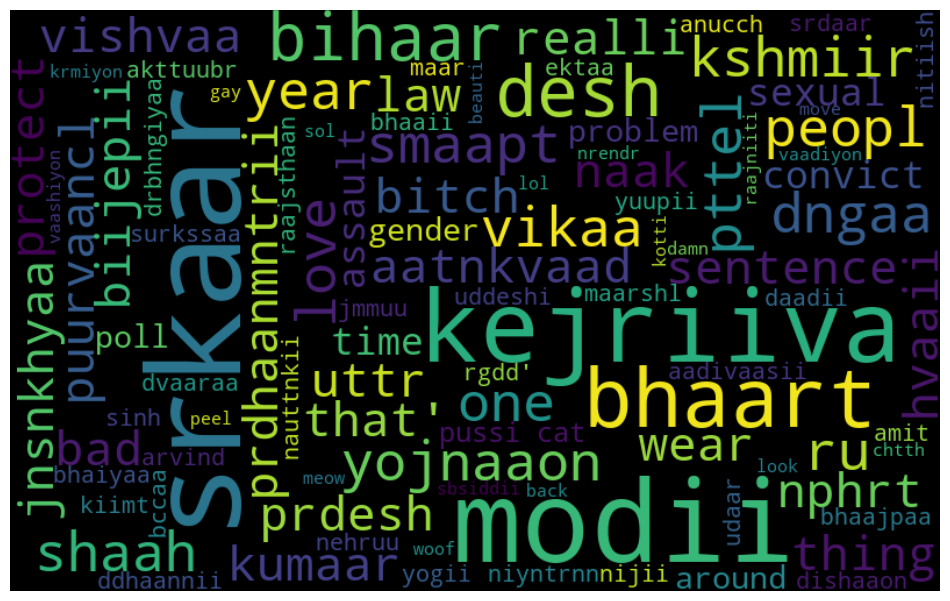

In [102]:
normal_words = ' '.join([word for word in df['clean_tweet'][df['value'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

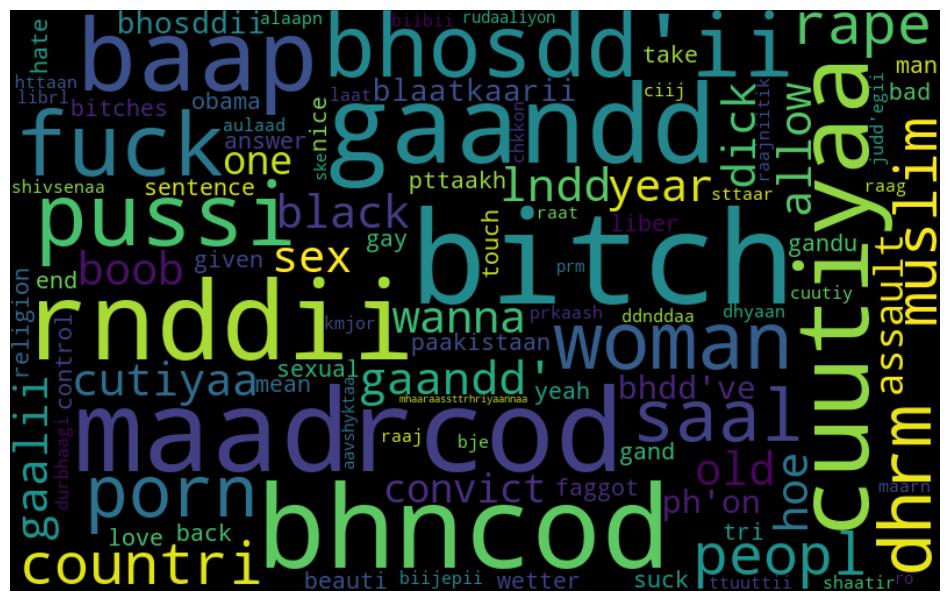

In [103]:

normal_words = ' '.join([word for word in df['clean_tweet'][df['value'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [104]:
df.head()

,text,value,clean_tweet
0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0,modii diidii pttel bo bhgt sinh raaj guru sukh...
1,है कौन ये मादरचोद,1,maadrcod
2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0,aasthaa mhaaprv chtthii bccon nirjlaa vrt bcca...
3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0,vrss bhaart srkaar dvaaraa akttuubr prtivrss r...
4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0,kejriiva srkaar phrii ttiktt ddhinddhoraa piit...


In [105]:


#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
# TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus)
Y1 = df.loc[:,'value'].values

In [106]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(df['clean_tweet'], df['value'], test_size = 0.3, random_state=0, shuffle = True, stratify=df['value'])
vectorizer = tfidf_vectorizer
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'value'].values

In [107]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted   0   1
Actual           
0          26   4
1           8  23
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.74      0.79        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [108]:
df.to_csv('clean.csv')

In [109]:
df =  pd.read_csv("clean.csv")

In [110]:
df.head()

,Unnamed: 0,text,value,clean_tweet
0,0,मोदी क्या आये दीदी पटेल बोस भगत सिंह राज गुरु...,0,modii diidii pttel bo bhgt sinh raaj guru sukh...
1,1,है कौन ये मादरचोद,1,maadrcod
2,2,आस्था के महापर्व छठी मे जो माँ अपने बच्चों के ...,0,aasthaa mhaaprv chtthii bccon nirjlaa vrt bcca...
3,3,वर्ष में भारत सरकार द्वारा अक्टूबर को प्रत...,0,vrss bhaart srkaar dvaaraa akttuubr prtivrss r...
4,4,केजरीवाल सरकार जो फ्री टिकट देने का ढिंढोरा पी...,0,kejriiva srkaar phrii ttiktt ddhinddhoraa piit...


In [111]:
df.shape

(203, 4)

In [112]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size = 0.2, stratify = df['value'], random_state=21)

# get the shape of train and test split.
train.shape, test.shape

((162, 4), (41, 4))

In [113]:
train.head()

,Unnamed: 0,text,value,clean_tweet
63,63,दिल्ली में रहनेवाले पूर्वांचल वाशियों को गाली ...,0,rhnevaal puurvaancl vaashiyon gaalii denevaala...
200,200,kameeni aurat chup kr,1,kameeni aurat chup
151,151,PostApocalypticHero why men no longer interest...,1,postapocalyptichero longer interest go touch p...
82,82,र रंडी़ बनना था तने तो दुष्यंत चौटाला प चला ...,1,r rnddii' dussynt cauttaalaa jaadaan amit shaa...
35,35,ये भोसड़ी वाला गाली का अविष्कार किसने किया और ...,1,bhosdd'ii gaalii avisskaar gaalii gaalii buraa...


In [114]:
test.head()

,Unnamed: 0,text,value,clean_tweet
80,80,खुदवा ली नहीं ये सारे जनता का चुतिया काटते हैं...,1,khudvaa cutiyaa kaattt
11,11,रंडी पोर्न स्टार की औलाद प्रकाश राज,1,rnddii porn sttaar aulaad prkaash raaj
121,121,i txt my old bitch my new bitch pussy wetter,1,txt old bitch bitch pussi wetter
111,111,damn! You are a funny bitch,0,damn! funni bitch
122,122,wear pushup bra for boob support,0,wear pushup bra boob support


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(train.clean_tweet)

TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [116]:
train_idf = tfidf_vectorizer.transform(train.clean_tweet)
test_idf  = tfidf_vectorizer.transform(test.clean_tweet)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, train.value)

# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

# f1 score on train data
f1_score(y_true= train.value, y_pred= predict_train)
## >> 0.4888178913738019

f1_score(y_true= test.value, y_pred= predict_test)

0.6938775510204083

In [118]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.clean_tweet, train.value)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('model', LogisticRegression())])

In [119]:
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# predict the label using the pipeline
pipeline.predict(text)
## >> array([0])

array([0], dtype=int64)

In [120]:
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

In [121]:
from joblib import load

# sample tweet text
text = ["Virat Kohli, AB de Villiers set to auction their 'Green Day' kits from 2016 IPL match to raise funds"]

# load the saved pipleine model
pipeline = load("text_classification.joblib")

# predict on the sample tweet text
pipeline.predict(text)

array([0], dtype=int64)